# EDA
This file goal is to do EDA before that Data cleaning is done

## Handling Missing Values


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\Kruthika Kamalapur\Downloads\train.csv")

In [5]:
print(data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
missing_values = data.isnull().sum()

## Calculates the total number of missing values for each column in the dataset.


In [8]:
print("Missing values per column:")
print(missing_values)

Missing values per column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [9]:
# Impute missing Item_Weight
data['Item_Weight'] = data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

# Impute missing Outlet_Size
data['Outlet_Size'] = data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verify no missing values
def check_missing_values(data):
    missing = data.isnull().sum()
    if missing.sum() == 0:
        print("No missing values remaining.")
    else:
        print("Remaining missing values:\n", missing[missing > 0])

# After imputations
check_missing_values(data)


No missing values remaining.


In [10]:
# Map values in Item_Fat_Content for consistency
fat_content_map = {
    'LF': 'Low Fat', 
    'low fat': 'Low Fat', 
    'Low Fat': 'Low Fat',
    'reg': 'Regular',
    'Regular' :'Regular'
}

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(fat_content_map)
print("Updated counts for Item_Fat_Content:\n", data['Item_Fat_Content'].value_counts())

Updated counts for Item_Fat_Content:
 Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


## **Outlier Detection and Mitigation**
We will use the Interquartile Range (IQR) method to detect outliers in continuous numerical features. Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where:

* Q1 is the first quartile (25th percentile).
* Q3 is the third quartile (75th percentile).
* IQR is the interquartile range, calculated as Q3 - Q1.

In [11]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Checking for outliers in numerical columns
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
outliers = {}

for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(data, col)
    print(f"Outliers detected in {col}: {len(outliers[col])}")


Outliers detected in Item_Weight: 0
Outliers detected in Item_Visibility: 144
Outliers detected in Item_MRP: 0
Outliers detected in Outlet_Establishment_Year: 0
Outliers detected in Item_Outlet_Sales: 186


## Outlier mitigation

In [12]:
def cap_outliers(data, columns, factor=1.5):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        data[column] = np.clip(data[column], lower_bound, upper_bound)

cap_outliers(data, numerical_cols)


In [13]:
cleaned_data_path = 'clean_train_Version1.csv'
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved at {cleaned_data_path}")

Cleaned dataset saved at clean_train_Version1.csv


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load the saved data for EDA
data = pd.read_csv('clean_train_Version1.csv')

# Display the first few rows of the cleaned data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Seaborn: A Data Visualization Library

- **Purpose**: Seaborn is used for **statistical data visualization**.
- **Key Features**:
  - **Built on Matplotlib**: Provides a high-level interface for drawing attractive graphics.
  - **Easy to Use**: Simplifies the creation of complex visualizations.
  - **Data Handling**: Works well with pandas DataFrames.
  - **Statistical Functions**: Integrates with statistical functions for better insights.

## Common Uses
- **Heatmaps**
- **Boxplots**
- **Pairplots**


In [16]:
print("\nTask 1: Distribution of Sales by Item Type")


Task 1: Distribution of Sales by Item Type


In [17]:
# Grouping data by 'Item_Type' and summing the sales to get total sales for each item type
item_sales = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
print("\nSales by Item Type:\n", item_sales)


Sales by Item Type:
 Item_Type
Fruits and Vegetables    2.776296e+06
Snack Foods              2.700518e+06
Household                2.033652e+06
Frozen Foods             1.808047e+06
Dairy                    1.487623e+06
Canned                   1.433068e+06
Baking Goods             1.260688e+06
Health and Hygiene       1.037204e+06
Meat                     9.083280e+05
Soft Drinks              8.795255e+05
Breads                   5.484601e+05
Hard Drinks              4.549704e+05
Starchy Foods            3.480416e+05
Others                   3.255176e+05
Breakfast                2.274503e+05
Seafood                  1.488666e+05
Name: Item_Outlet_Sales, dtype: float64


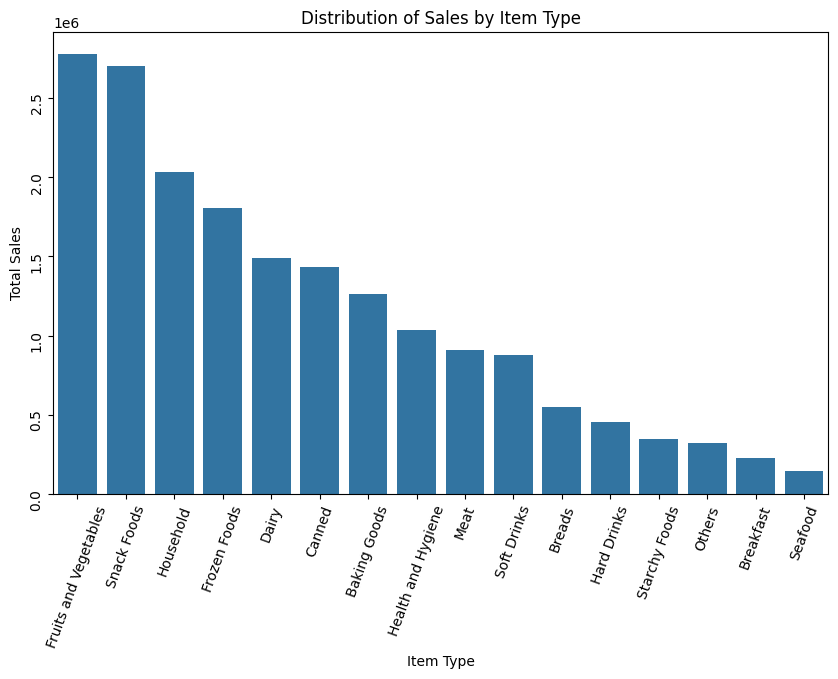

In [18]:
# Visualization: Bar Plot for Distribution of Sales by Item Type
plt.figure(figsize=(10,6))
sns.barplot(x=item_sales.index, y=item_sales.values)
plt.xticks(rotation=70)
plt.yticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

In [19]:
# Observation for Task 1
# The observation would include identifying which item types generate the most sales.
top_item_type = item_sales.idxmax()
print(f"Observation: The item type '{top_item_type}' generates the highest sales.")

Observation: The item type 'Fruits and Vegetables' generates the highest sales.


In [20]:
# Task 2: Sales Performance by Outlet Establishment Year
print("\nTask 2: Sales Performance by Outlet Establishment Year")
# Grouping data by 'Outlet_Establishment_Year' and calculating the mean sales
yearly_sales = data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_values()
print("\nAverage Sales by Outlet Establishment Year:\n", yearly_sales)


Task 2: Sales Performance by Outlet Establishment Year

Average Sales by Outlet Establishment Year:
 Outlet_Establishment_Year
1998     339.351662
2009    1994.847647
2002    2180.051014
1997    2265.838389
1987    2286.061090
2007    2320.691557
1999    2341.687686
1985    2386.110924
2004    2427.936348
Name: Item_Outlet_Sales, dtype: float64


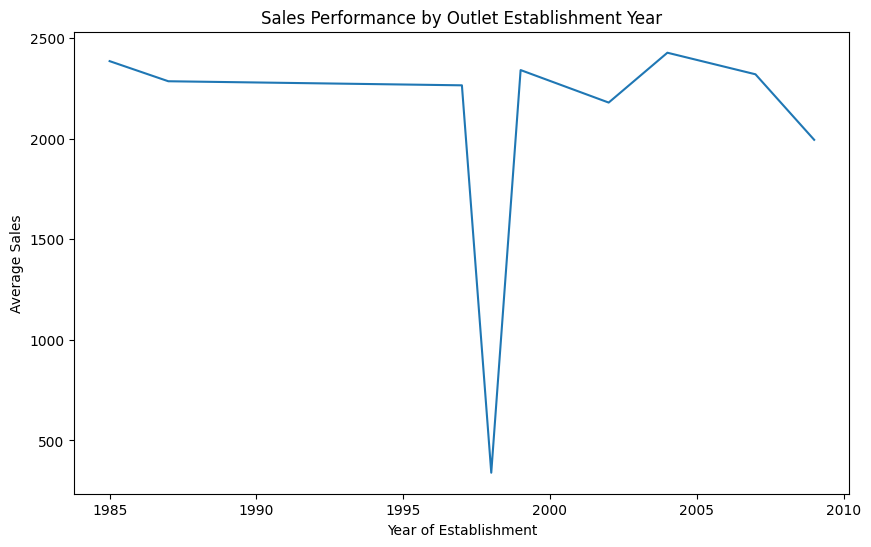

In [21]:
# Visualization: Line Plot for Sales Performance by Outlet Establishment Year
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Sales Performance by Outlet Establishment Year')
plt.xlabel('Year of Establishment')
plt.ylabel('Average Sales')
plt.show()


In [22]:
# Observation for Task 2
# Observing how sales vary with the outlet's year of establishment.
best_year = yearly_sales.idxmax()
print(f"Observation: Outlets established in the year '{best_year}' have the highest average sales.")

Observation: Outlets established in the year '2004' have the highest average sales.


In [23]:
# Task 3: Sales Distribution Across Outlet Types
print("\nTask 3: Sales Distribution Across Outlet Types")
# Grouping data by 'Outlet_Type' and calculating sales statistics
outlet_sales_stats = data.groupby('Outlet_Type')['Item_Outlet_Sales'].describe()
print("\nSales Statistics by Outlet Type:\n", outlet_sales_stats)



Task 3: Sales Distribution Across Outlet Types

Sales Statistics by Outlet Type:
                     count         mean          std       min         25%  \
Outlet_Type                                                                 
Grocery Store      1083.0   339.828500   260.851582   33.2900   153.79980   
Supermarket Type1  5577.0  2303.714679  1473.990308   73.2380  1151.16820   
Supermarket Type2   928.0  1994.847647  1373.743315   69.2432   981.55565   
Supermarket Type3   935.0  3541.375602  1806.883122  241.6854  2044.33890   

                         50%         75%        max  
Outlet_Type                                          
Grocery Store       256.9988   458.73620  1775.6886  
Supermarket Type1  1990.7420  3135.91800  6501.8699  
Supermarket Type2  1655.1788  2702.64865  6501.8699  
Supermarket Type3  3364.9532  4975.52340  6501.8699  


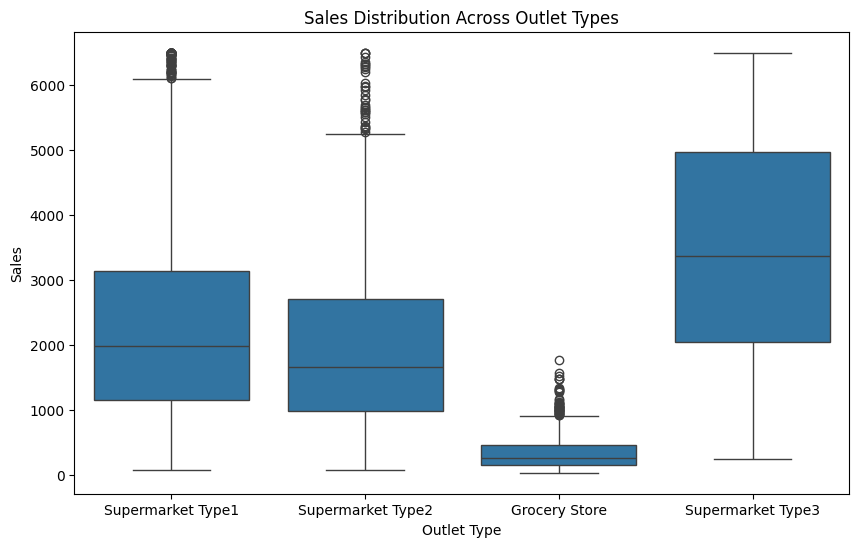

In [24]:
# Visualization: Box Plot for Sales Distribution Across Outlet Types
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title('Sales Distribution Across Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.show()

In [25]:
# Observation for Task 3
# Checking which outlet types show the highest sales distribution.
most_sales_outlet_type = data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().idxmax()
print(f"Observation: '{most_sales_outlet_type}' outlets tend to have the highest average sales.")

Observation: 'Supermarket Type3' outlets tend to have the highest average sales.


In [26]:
# Task 4: Effect of Outlet Size on Sales
print("\nTask 4: Effect of Outlet Size on Sales")
# Grouping data by 'Outlet_Size' and calculating the mean sales
size_sales = data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
print("\nAverage Sales by Outlet Size:\n", size_sales)


Task 4: Effect of Outlet Size on Sales

Average Sales by Outlet Size:
 Outlet_Size
Medium    2628.060993
High      2286.061090
Small     1856.496987
Name: Item_Outlet_Sales, dtype: float64


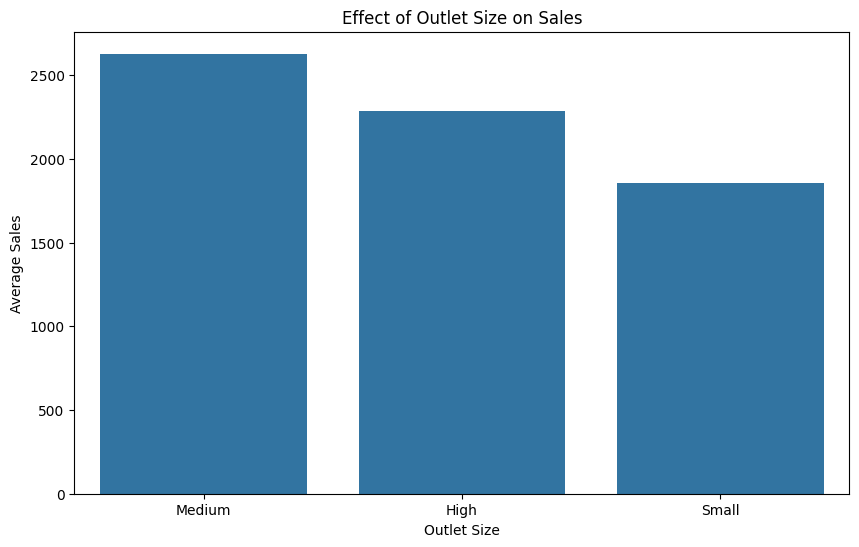

In [27]:
# Visualization: Bar Plot for Effect of Outlet Size on Sales
plt.figure(figsize=(10,6))
sns.barplot(x=size_sales.index, y=size_sales.values)
plt.title('Effect of Outlet Size on Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.show()

In [28]:
# Observation for Task 4
# Observing how the size of an outlet impacts sales.
top_outlet_size = size_sales.idxmax()
print(f"Observation: Large outlets generate the highest average sales, with '{top_outlet_size}' size outlets performing best.")

Observation: Large outlets generate the highest average sales, with 'Medium' size outlets performing best.


In [29]:
# Task 5: Relationship Between Item MRP and Sales
print("\nTask 5: Relationship Between Item MRP and Sales")


Task 5: Relationship Between Item MRP and Sales


In [30]:
# Checking correlation between 'Item_MRP' and 'Item_Outlet_Sales'
correlation = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
print(f"Correlation between Item MRP and Sales: {correlation:.2f}")

Correlation between Item MRP and Sales: 0.57


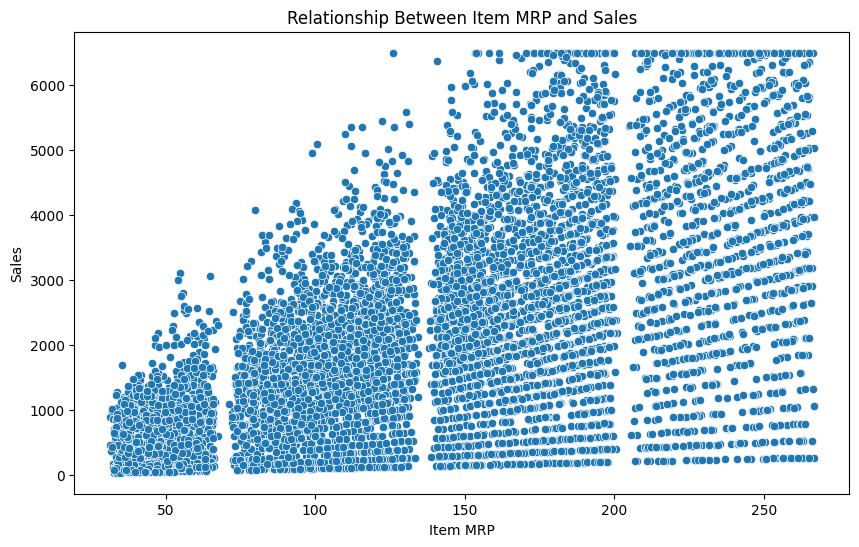

In [31]:
# Visualization: Scatter Plot for Relationship Between Item MRP and Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)
plt.title('Relationship Between Item MRP and Sales')
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.show()


In [32]:
#Observation for Task 5
# Observing the correlation between MRP and sales to see if higher-priced items result in higher sales.
if correlation > 0:
    print(f"Observation: There is a positive correlation between Item MRP and Sales (Correlation = {correlation:.2f}). Higher priced items tend to generate more sales.")
else:
    print(f"Observation: There is a weak or negative correlation (Correlation = {correlation:.2f}), meaning MRP has little or no effect on sales.")

Observation: There is a positive correlation between Item MRP and Sales (Correlation = 0.57). Higher priced items tend to generate more sales.
